In [1]:
import numpy as np
import pandas as pd
from rdkit import rdBase, Chem, DataStructs
from rdkit.Chem import MACCSkeys
from rdkit.Avalon import pyAvalonTools
from rdkit.Chem import AllChem, Draw
from rdkit.Chem import Lipinski
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

import matplotlib.pyplot as plt
import seaborn as sns

from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit.Chem.AtomPairs import Pairs, Torsions
from rdkit.Chem.Draw import SimilarityMaps

In [2]:
import csv

with open('Hepatoprotection.csv', 'r', newline='') as f:
    reader = csv.DictReader(f)
    smi = []
    for row in reader:
        if row['standardize_smiles'] :
            smi.append(row['standardize_smiles'])
mols = [Chem.MolFromSmiles(x) for x in smi]

In [3]:
fcfp4_fps = [AllChem.GetMorganFingerprintAsBitVect(mol, 2, 1024,useFeatures = True) for mol in mols]

In [5]:
simi_map = []
for i in range(len(fcfp4_fps)):
    simi = DataStructs.BulkTanimotoSimilarity(fcfp4_fps[i], fcfp4_fps[0:])
    simi_map.append(simi)
simi_df = pd.DataFrame(simi_map,columns = np.arange(1,(len(fcfp4_fps)+1)),index = np.arange(1,(len(fcfp4_fps)+1)))

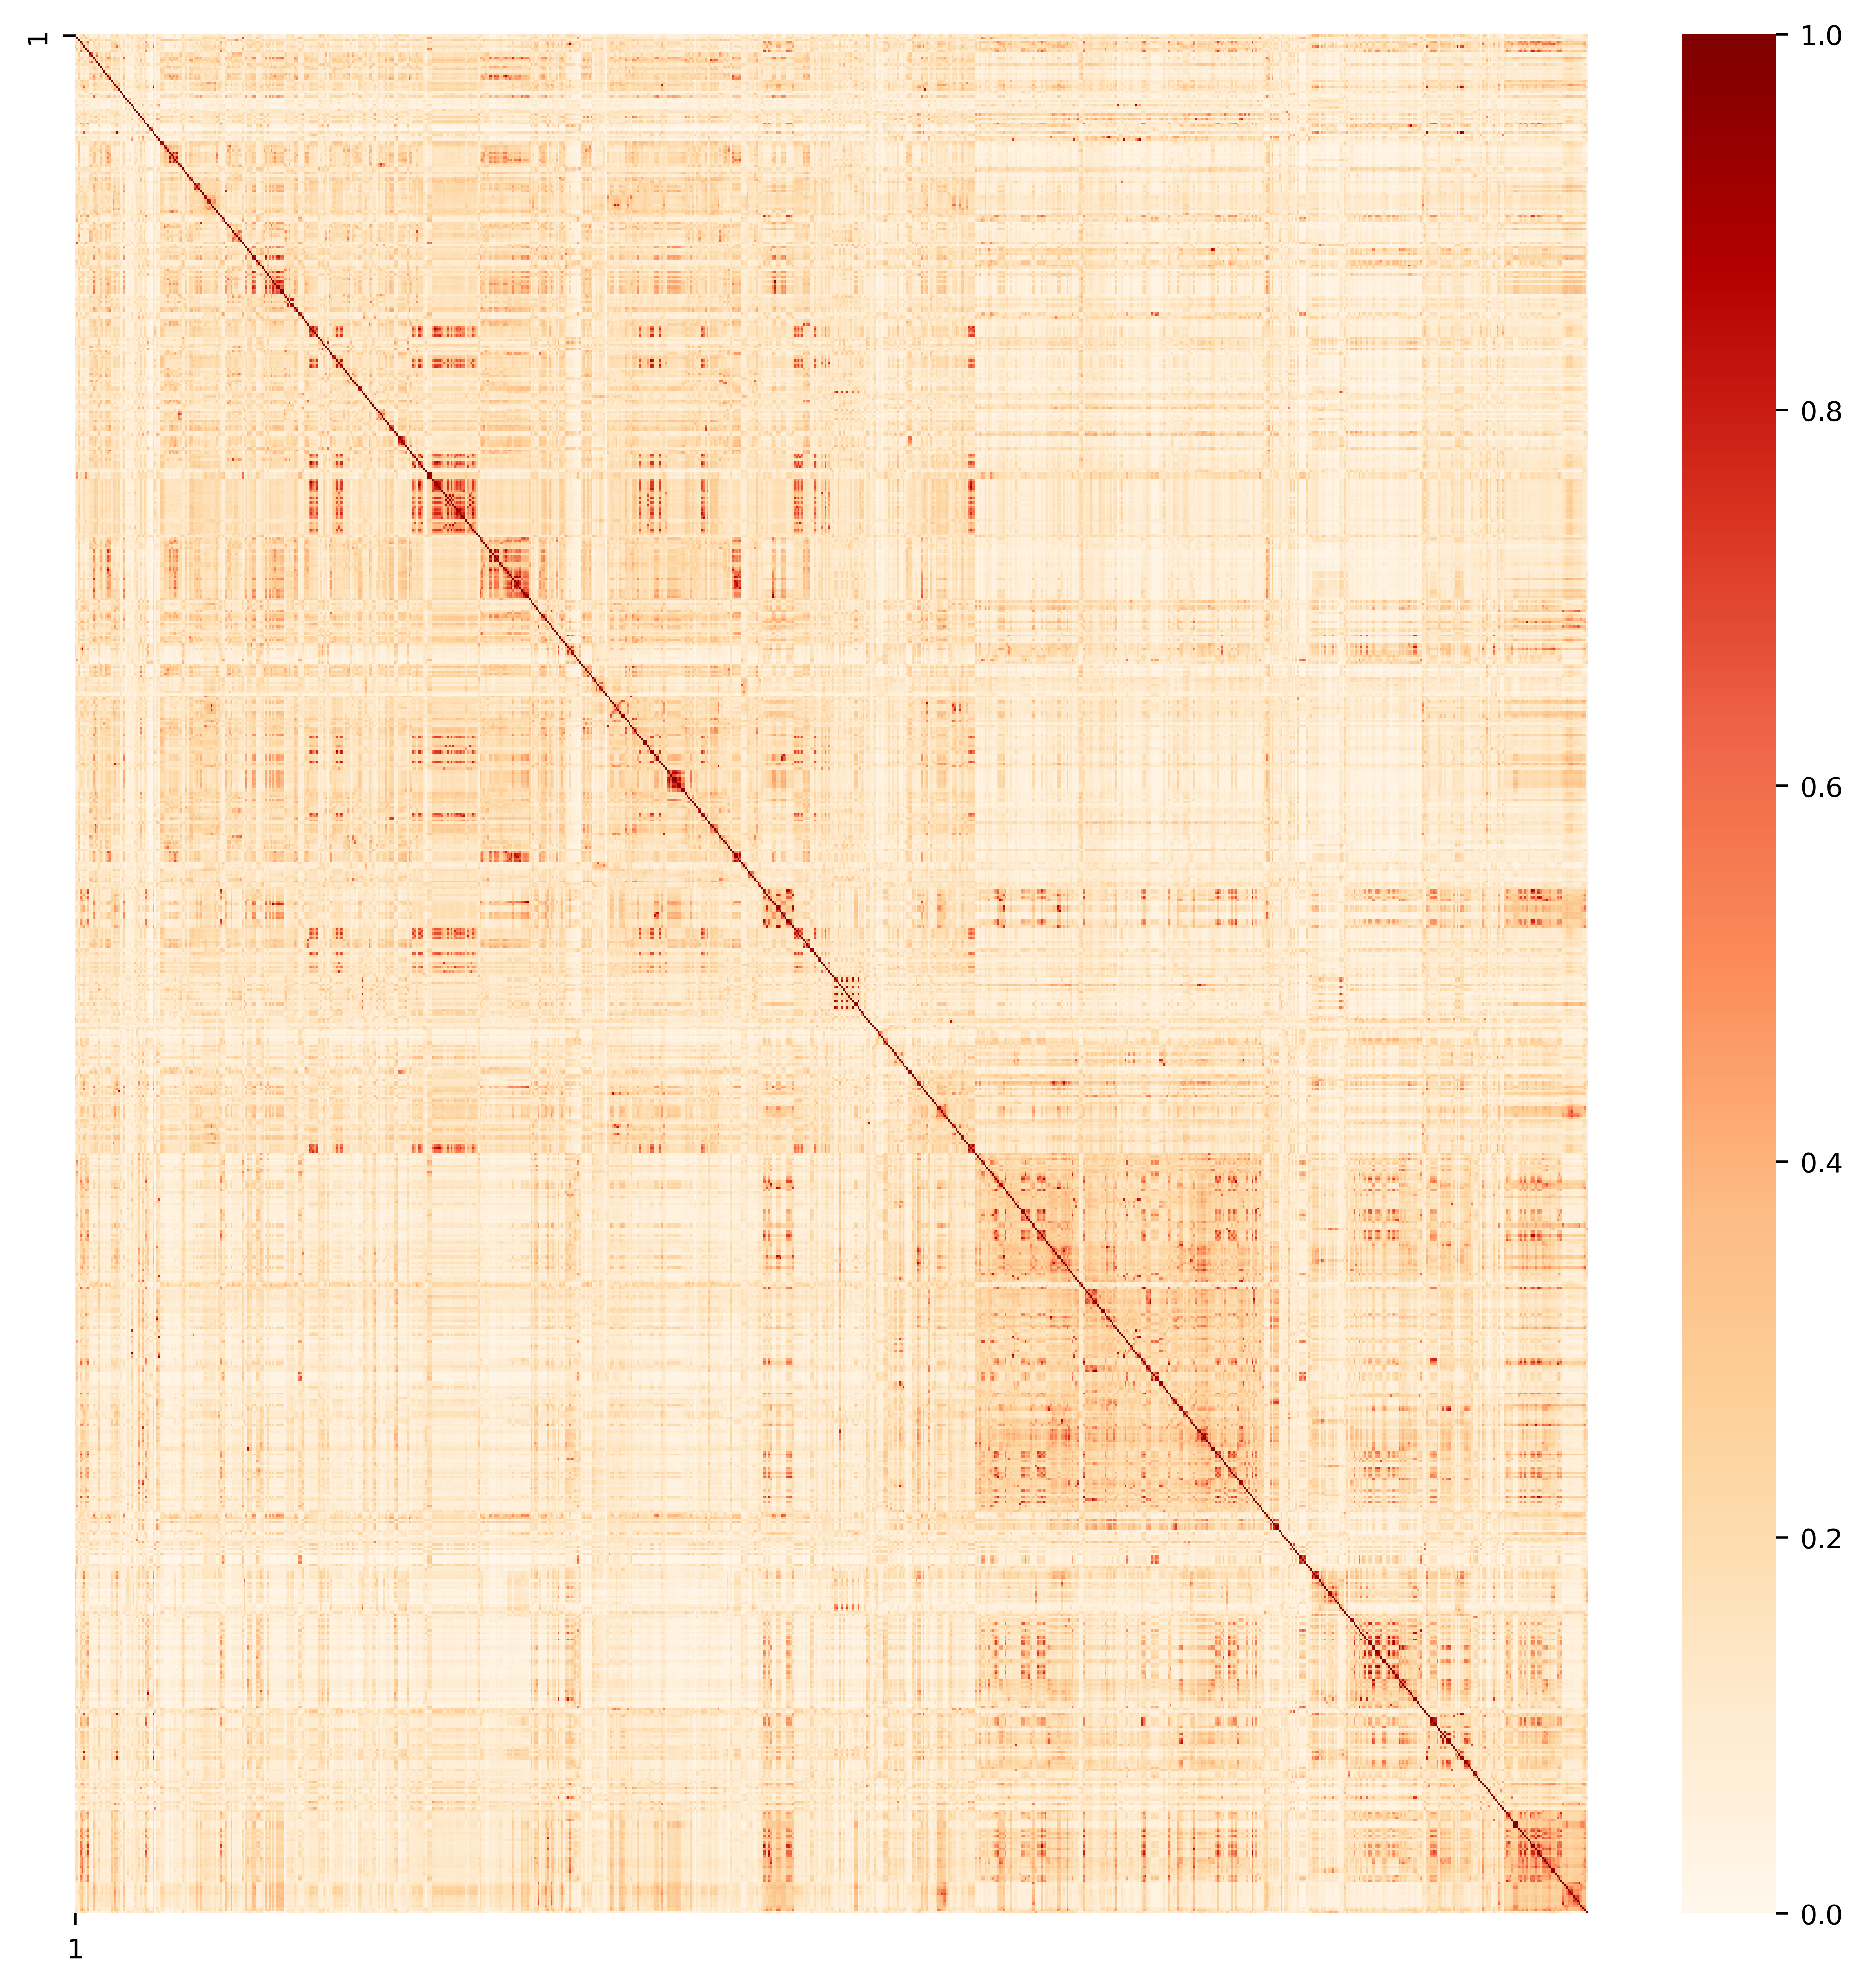

In [8]:

import seaborn as sns  
#引入seaborn库
plt.figure(figsize=(10,10),dpi= 500)
ax = sns.heatmap(data=simi_df,cmap="OrRd",center = 0.5,xticklabels=1500,yticklabels=1500)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=8)

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.savefig('similarity map.png')
plt.show()